In [1]:
%%capture
pip install git+https://github.com/ergodic-ai/magpy.git

In [2]:
import numpy as np, pandas as pd
import networkx as nx
from magpy.search.astar import AStarSearch, bic_score_node
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
%%time

astar = AStarSearch(data.iloc[:1000, :10])
astar.run_scoring(func=bic_score_node, parallel=True)
result = astar.search()

  0%|          | 0/5120 [00:00<?, ?it/s]

CPU times: user 5.76 s, sys: 666 ms, total: 6.43 s
Wall time: 9.26 s


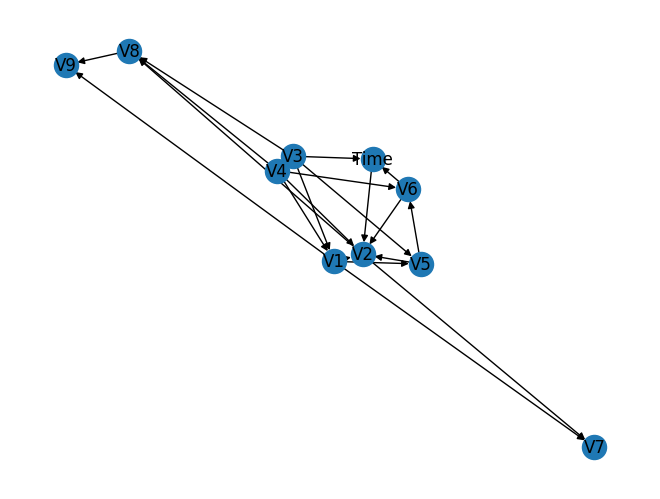

In [5]:
G = nx.from_pandas_adjacency(result, create_using=nx.DiGraph)

nx.draw(G, with_labels=True)
plt.show()